In [13]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation

tau = 2 * np.pi

In [2]:
from modules.visualize import plot_complex, double_plot

## Fourier Transform

[Continuous](https://en.wikipedia.org/wiki/Fourier_transform#The_Fourier_transform_on_R)
$$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-i\tau\xi x} dx$$
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(\xi) e^{i\tau\xi x} d\xi$$


[Discrete](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Definition)
$$X_{k} = \sum_{n=0}^{N-1} x_{n} e^{-i\tau kn / N}$$
$$x_{n} = \frac{1}{N}\sum_{k=0}^{N-1} X_{k} e^{i\tau kn / N}$$

In [3]:
from fourier_core import DFT, inv_DFT, get_DFT_approximation

## Fourier Series

[Exponential form](https://en.wikipedia.org/wiki/Fourier_series#Exponential_form)

$$ c_{n} = \frac{1}{P} \int_{-P/2}^{P/2} s(x) e^{- \frac{i \tau n x}{P}} dx $$

$$ s(x) = \sum_{n=-\infty}^{\infty} c_{n} \cdot e^{\frac{i \tau n x}{P}} $$

To simplify things, let's keep the period $1$,

$$ c_{n} = \int_{0}^{1} s(x) e^{-i \tau n x} dx $$

If input is discrete then the integral can be approximated using \
numerical integration methods such as the [Riemann Sum](https://en.wikipedia.org/wiki/Riemann_sum):

$$ c_{n} = \sum_{x=0}^{1} s(x) e^{-i \tau n x} \Delta x $$ 
where $\Delta x = 1/N$, so

$$ c_{n} = \frac{1}{N} \sum_{x=0}^{1} s(x) e^{-i \tau n x} $$

$$ s(x) = \sum_{n=-\infty}^{\infty} c_{n} \cdot e^{i \tau n x} $$

In [4]:
from fourier_core import get_coeffs, fourier_series, get_fourier_approximation

## Joseph Fourier

https://twitter.com/Biocinematics/status/1143330623131738112/photo/1

https://www.amritaryal.com.np/posts/categories/mathematics-and-engineering/2.html

https://mohammed-a-elkomy.medium.com/yet-another-fourier-series-animation-in-python-6c3a1ac579b8

In [6]:
from modules.data_utils import parse_svg

In [7]:
points = parse_svg('data/fourier.svg')

paths:   0%|          | 0/1 [00:00<?, ?it/s]

time:   0%|          | 0/1000 [00:00<?, ?it/s]

### Fourier approximation

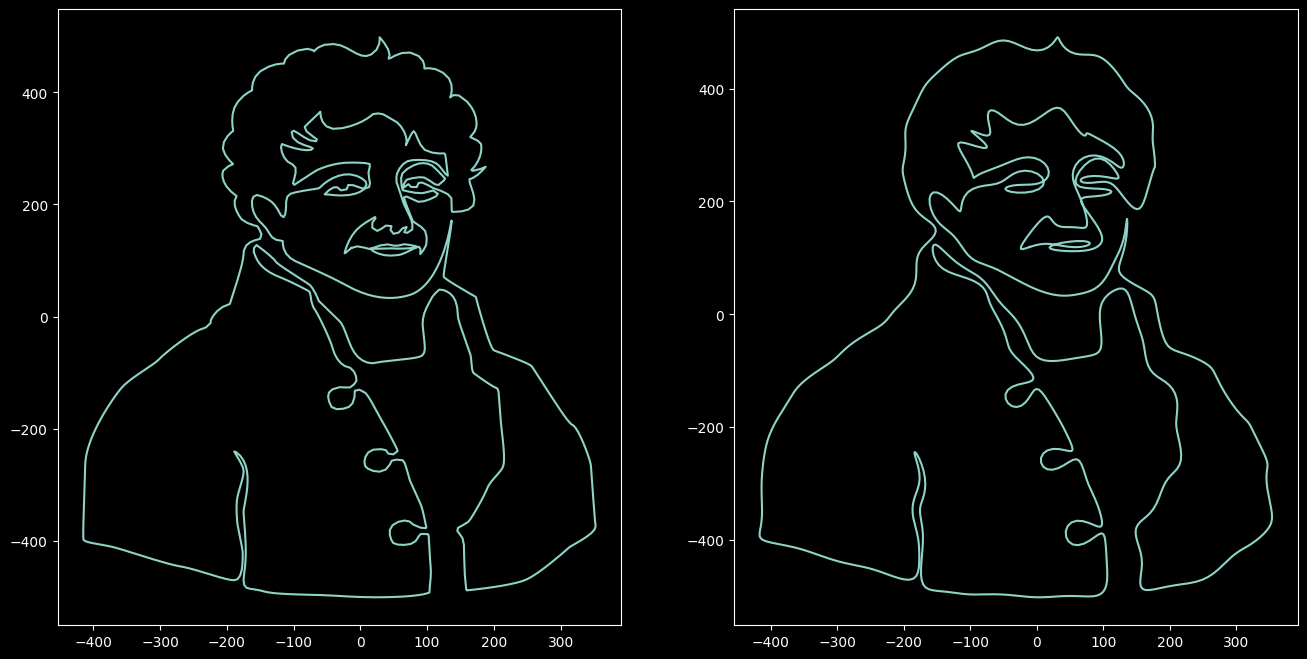

In [8]:
x = points
x_appr = get_fourier_approximation(x, 100)

double_plot(x, x_appr)

### Approximation animation

#### Evolution (Coeff progression)

In [9]:
from modules.fourier_utils import get_apprs
from modules.visualize import evolution_animate

In [10]:
x = points
order = 200
coeffs = get_coeffs(x, order)

x_apprs, errs = get_apprs(x, coeffs, order)

calculating approximations:   0%|          | 0/200 [00:00<?, ?it/s]

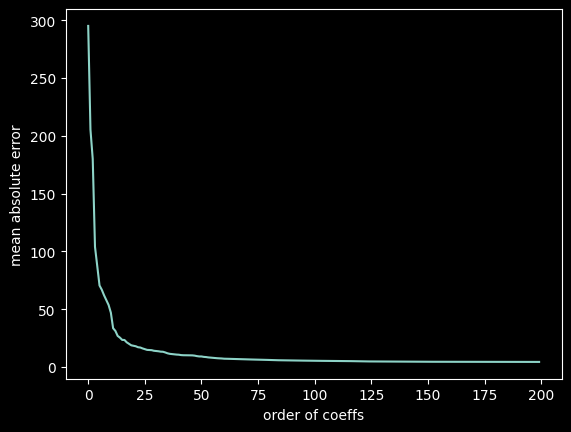

In [11]:
plt.plot(errs)
plt.xlabel('order of coeffs')
plt.ylabel('mean absolute error')
plt.show()

In [15]:
anim = evolution_animate(x_apprs, errs)
anim.save(f"animations/evolution.gif", writer=animation.PillowWriter(fps=10))

generating evolution animation:   0%|          | 0/200 [00:00<?, ?it/s]

#### Epicycles (Time progression)

In [16]:
from modules.fourier_utils import get_epicycle_data
from modules.visualize import add_arrows, epicycles_animate

$$ center_n = c_0 + \sum_{n=1}^{\left\lceil \frac{n}{2} \right\rceil} c_n + \sum_{n=1}^{\left\lfloor \frac{n}{2} \right\rfloor} c_{-n} $$

$$ radius_n = |centers_{n+1} - centers_n| 
 = |c_{{-1}^{n+1} \left\lfloor \frac{n+1}{2} \right\rfloor}| $$

In [21]:
x = points
order = 100
coeffs = get_coeffs(x, order)
n_samples = 500  # number of time points to sample


centers_time, radii_time, circle_pts_time = get_epicycle_data(coeffs, n_samples, order)

calculating centers and radii:   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# Cell to test add_arrows function

pts = np.array([0, 1+1j, 2, 3+1j, 2+2j, 1j])
plot_complex(pts)
plt.show()
arrowed_pts = add_arrows(pts)
plot_complex(arrowed_pts)
plt.show()

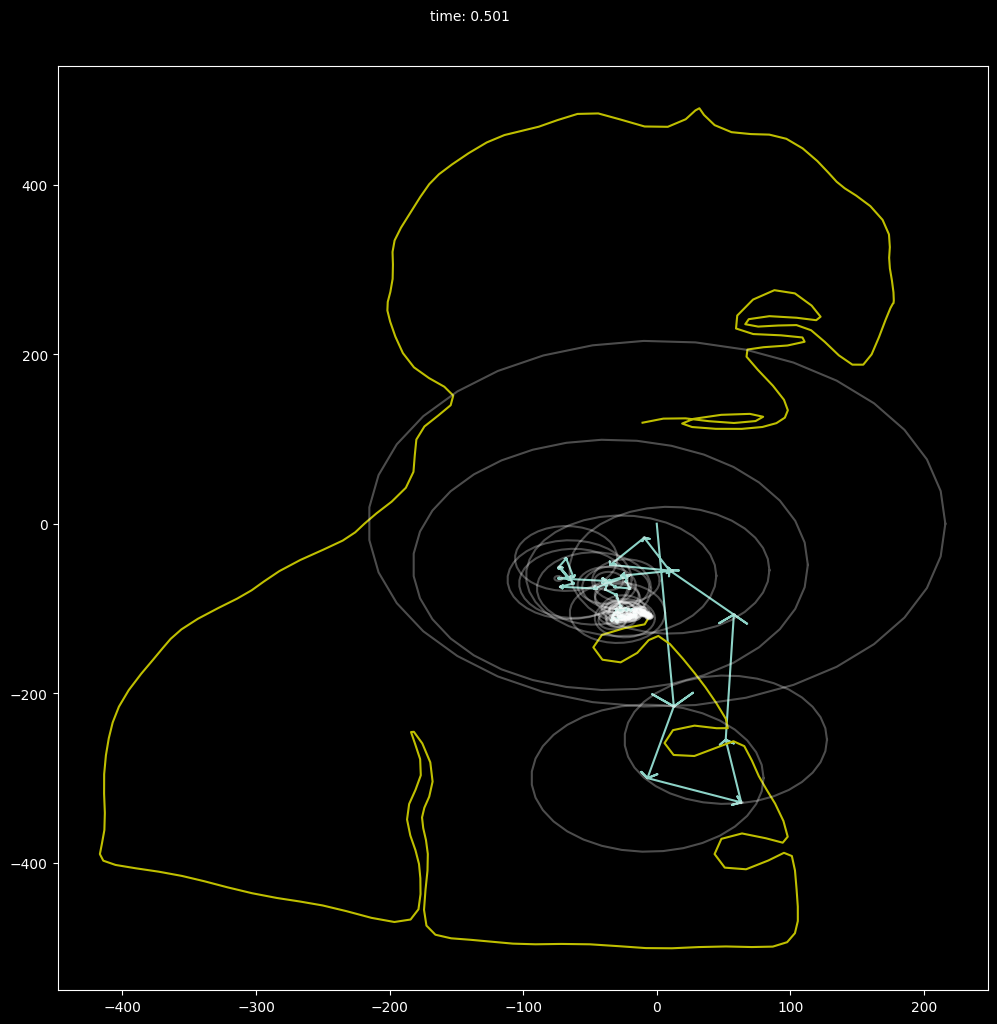

In [23]:
fig, ax = plt.subplots(figsize=(12,12))
i = int(n_samples * 0.5)

centers, radii = centers_time[i], radii_time[i]
x_coords, y_coords = centers.real, centers.imag

# Plot vectors.
# plot_complex(centers, c='w')
vectors = add_arrows(centers)
plot_complex(vectors)

# Plot curve.
plot_complex(centers_time[:i+1, -1], c='y')

# plot circles.
plot_complex(circle_pts_time[i].T, c='w', alpha=0.3)

plt.text(0.4, 1.05, f'time: {i/(n_samples-1):.3f}', transform = plt.gca().transAxes)

plt.show()

In [20]:
anim = epicycles_animate(centers_time, radii_time, circle_pts_time)
anim.save(f"animations/epicycles.gif", writer=animation.PillowWriter(fps=10))

generating epicycles animation:   0%|          | 0/500 [00:00<?, ?it/s]